Основы Scikit-learn


In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
#pd.set_option('display.mpl_style', 'default')
figsize(8, 8)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


# Разбивка на обучение и контроль

Встроенные датасеты

Text(0, 0.5, 'second feature')

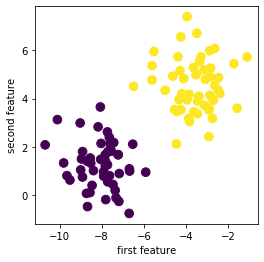

In [2]:
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = 4, 4
X, y = make_blobs(centers=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'second feature')

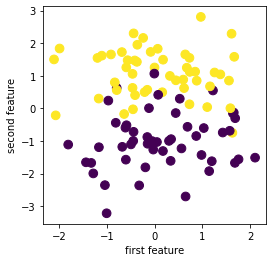

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'second feature')

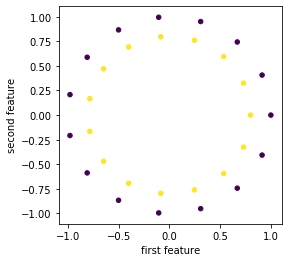

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(30)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'second feature')

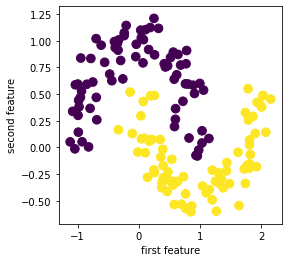

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(150, noise=0.15)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

Регрессия: линейная

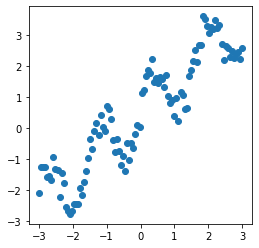

In [6]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o')

чтобы применять регрессию надо получить 2d-массив!

In [7]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(100,)
(100, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred_train = regressor.predict(X_train)

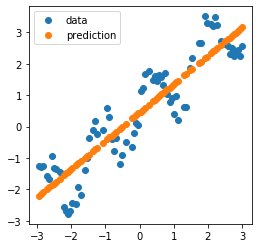

In [10]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

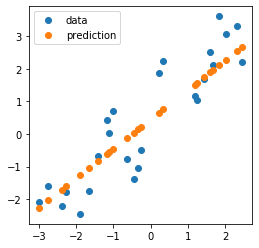

In [11]:
y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')


In [12]:
print (regressor.score(X_test, y_test))
print (regressor.score(X_train, y_train))

0.7994321405079685
0.8189190775347295


# Регрессия: kNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

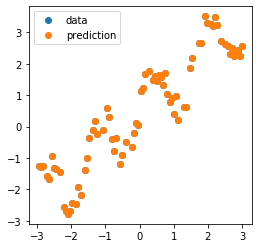

In [14]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

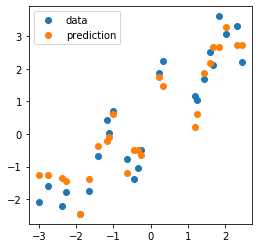

In [15]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [16]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

# Кластеризация

(100, 2)

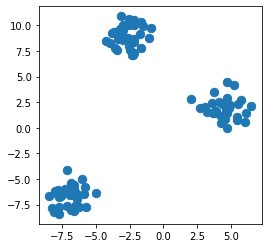

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=70)
X.shape

[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


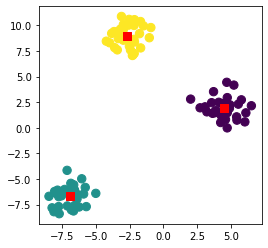

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=70)

mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=50, c='red', marker='s')
print(mu)